<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/LHC1_Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np      
import matplotlib.pyplot as plt   
import pandas as pd     
import seaborn as sns

In [8]:
from google.colab import drive  #import gogle drive data

In [9]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [11]:
dataset=pd.read_csv("Mall_Customers.csv")
print(dataset)
dataset.shape

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


(200, 5)

In [12]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **pie chart to show the distribution of male and female**

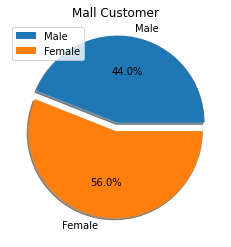

In [21]:
data_male = dataset.loc[dataset['Genre'] == 'Male']
data_female = dataset.loc[dataset['Genre'] == 'Female']

plt.pie([len(data_male),len(data_female)],labels=['Male','Female'],shadow=True,
        explode=(0.1,0),autopct='%1.1f%%')
plt.title("Mall Customer")
plt.legend(loc=2)
plt.show()

## **histogram of ages w.r.t the number of counts**

In [39]:
print(max(dataset['Age']))

70


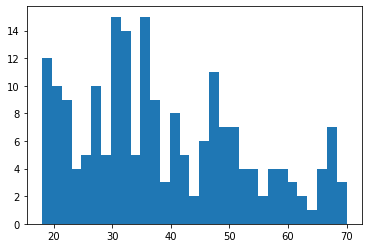

In [40]:
plt.hist(dataset['Age'],bins=31)
plt.show()

## **boxplot of analysis of age**

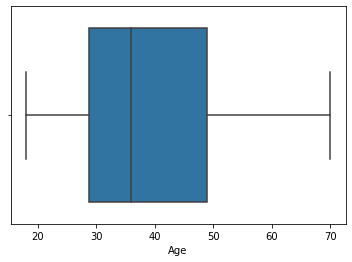

In [25]:
sns.boxplot(x=dataset["Age"])

## **histogram of income**

In [33]:
print(max(dataset['Annual Income (k$)']))

137


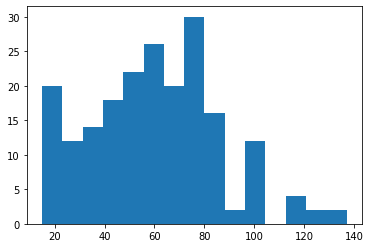

In [30]:

plt.hist(dataset['Annual Income (k$)'],bins=15)
plt.show()

## **histogram of spending score**

In [34]:
print(max(dataset['Spending Score (1-100)']))

99


<function matplotlib.pyplot.show>

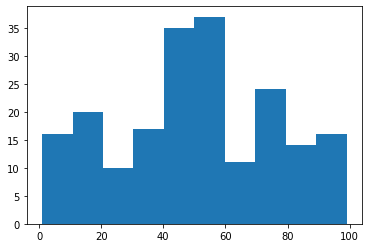

In [31]:
plt.hist(dataset['Spending Score (1-100)'],bins=10)
plt.show

## **Clustering**

In [35]:
from sklearn.cluster import KMeans

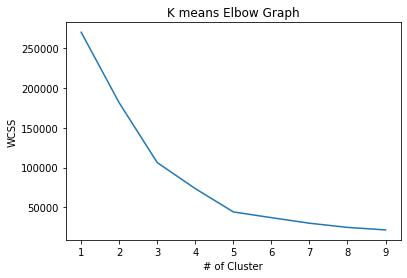

In [36]:
data = dataset.iloc[:, [3, 4]].values
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(data)

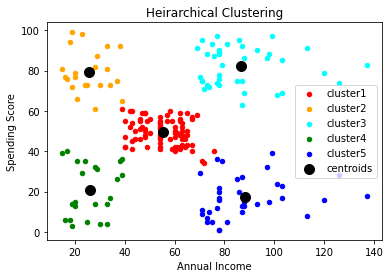

In [38]:
#visualizing the Cluster
plt.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=20,c='red',label='cluster1')
plt.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=20,c='orange',label='cluster2')
plt.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=20,c='cyan',label='cluster3')
plt.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=20,c='green',label='cluster4')
plt.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=20,c='blue',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()  
plt.show()